In [44]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
import seaborn as sns

import helper
import data_loading
import time

In [2]:
train_data, test_data, _ = data_loading.get_data()

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
28709 7178


In [3]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.module = nn.Sequential(
            nn.Conv2d(1, 16, (3, 3)),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, (3, 3)),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(32 * 10 * 10, 512),
            nn.Sigmoid(),
            nn.Linear(512, 64),
            nn.Sigmoid(),
            nn.Linear(64, 7),
            nn.Softmax(dim=1)           
        )
    
    def forward(self, x):
        return self.module(x)
    
device = "cuda"
model = Model().to(device)
# print(model)

total_params = 0
for p in model.parameters():
    # print(p.shape, p.numel())
    total_params += p.numel()
print(f"total_params : {total_params:,}")

total_params : 1,676,999


In [4]:
results = []

In [10]:
batch = 1024
epoch = 1000
lr = 1e-5

results = list(results)

train_data_loader = DataLoader(train_data, batch_size=batch, shuffle=True)
test_data_loader = DataLoader(test_data, batch_size=batch, shuffle=True)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr)

for _ in range(epoch):
    s = time.time()
    results.append(helper.fit(model, 
                              train_data_loader,
                              test_data_loader,
                              loss_fn,
                              optimizer,
                              device 
                            )
                    )
    e = time.time()
    e = round(e - s, 3)
    print(250+_, e, results[-1], sep = "\t")

250	1.948	[1.6847799728656638, 48.27057717092201, 1.7443259060382843, 44.37169127890777]
251	1.676	[1.686382614333054, 48.39945661639207, 1.7074110358953476, 44.3856227361382]
252	1.677	[1.6888615468452717, 48.33327527952907, 1.7139940708875656, 44.34382836444692]
253	1.692	[1.6928500265910709, 48.409906301159914, 1.7268569767475128, 44.204513792142656]
254	1.675	[1.690821569541405, 48.37855724685639, 1.70892933011055, 44.260239621064365]
255	1.681	[1.6879832169105267, 48.34024173604096, 1.71305251121521, 44.41348565059906]
256	1.775	[1.6924032260631692, 48.319342366505275, 1.7151902914047241, 44.37169127890777]
257	1.686	[1.682644667296574, 48.357657877320705, 1.7126360684633255, 44.37169127890777]
258	1.714	[1.6912141750598777, 48.40293984464802, 1.678815096616745, 44.28810253552521]
259	1.691	[1.6860729168201316, 48.37159079034449, 1.7286052107810974, 44.45528002229033]
260	1.695	[1.690689909047094, 48.49350377930266, 1.7425399124622345, 44.24630816383394]
261	1.675	[1.6894431031983

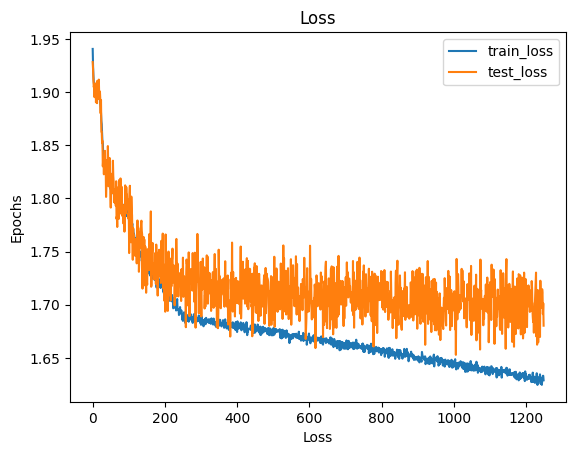

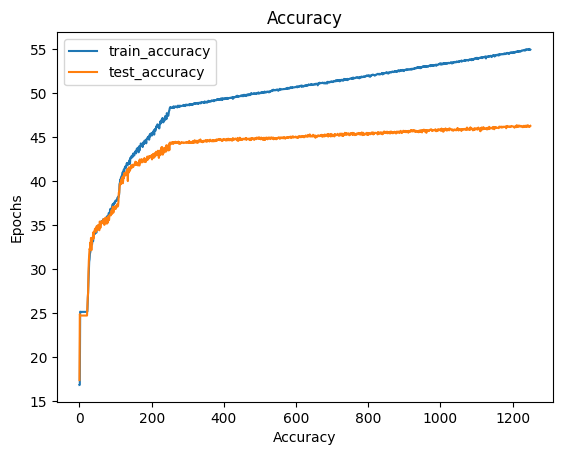

In [11]:
results = np.array(results)
helper.plot_result(results)

In [62]:
conf = torch.zeros((7,7))
for X,y in test_data_loader:
    temp = torch.zeros((7,7))
    X, y = X.to(device), y.to(device)
    y_yat = model(X).argmax(1)
    y_yat = torch.vstack((y, y_yat)).T.to("cpu")
    for i in range(7):
        for j in range(7):
            conf[i][j] += ((y_yat == torch.tensor([i,j])).sum(axis=1) == 2).sum().item()

In [63]:
conf

tensor([[   0.,    0.,  143.,  263.,  211.,  285.,   56.],
        [   0.,    0.,   23.,   26.,   22.,   36.,    4.],
        [   0.,    0.,  241.,  195.,  215.,  242.,  131.],
        [   0.,    0.,   77., 1334.,  152.,  188.,   23.],
        [   0.,    0.,   52.,  235.,  679.,  218.,   49.],
        [   0.,    0.,   93.,  226.,  278.,  607.,   43.],
        [   0.,    0.,   80.,  108.,  106.,   75.,  462.]])

In [64]:
import seaborn as sns

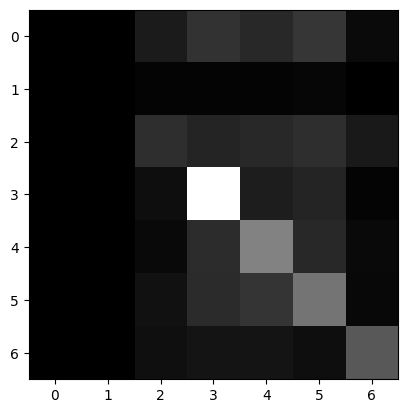

In [65]:
plt.imshow(conf/conf.sum(), cmap="gray")#, annot = True)

In [66]:
conf.sum(axis=1)

tensor([ 958.,  111., 1024., 1774., 1233., 1247.,  831.])

<Axes: >

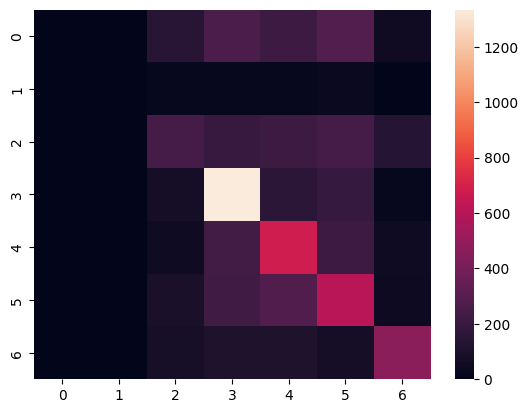

In [67]:
sns.heatmap(conf, annot=False)

In [68]:
for i in range(7):
    conf[i] = conf[i]/conf[i].sum()

In [70]:
conf.sum(), conf.sum(1)

(tensor(7.), tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]))

<Axes: >

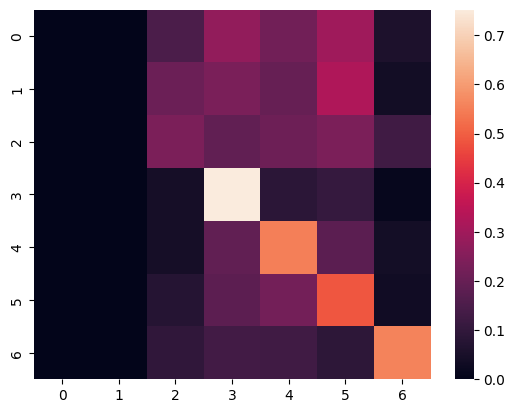

In [71]:
sns.heatmap(conf)

In [72]:
conf

tensor([[0.0000, 0.0000, 0.1493, 0.2745, 0.2203, 0.2975, 0.0585],
        [0.0000, 0.0000, 0.2072, 0.2342, 0.1982, 0.3243, 0.0360],
        [0.0000, 0.0000, 0.2354, 0.1904, 0.2100, 0.2363, 0.1279],
        [0.0000, 0.0000, 0.0434, 0.7520, 0.0857, 0.1060, 0.0130],
        [0.0000, 0.0000, 0.0422, 0.1906, 0.5507, 0.1768, 0.0397],
        [0.0000, 0.0000, 0.0746, 0.1812, 0.2229, 0.4868, 0.0345],
        [0.0000, 0.0000, 0.0963, 0.1300, 0.1276, 0.0903, 0.5560]])

NameError: name 'emotion_map' is not defined

In [12]:
! shutdown -h

In [12]:
1/0

ZeroDivisionError: division by zero

In [17]:
with torch.no_grad():
    pred = model(X)

In [19]:
pred.argmax(1)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')

In [20]:
y

tensor([6, 6, 6, 6, 6, 6, 6, 6, 6, 6], device='cuda:0')

In [16]:
for X, y in test_data_loader:
    X, y = X.to(device), y.to(device)

In [ ]:
y = [_[1] for _ in train_data]

In [ ]:
dict(Counter(y))

{0: 3995, 1: 436, 2: 4097, 3: 7215, 4: 4965, 5: 4830, 6: 3171}

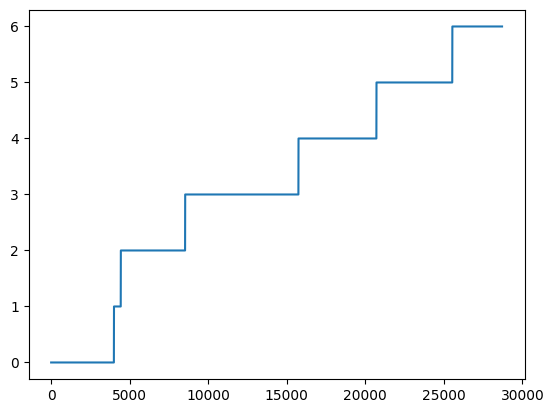

In [ ]:
plt.plot(y)

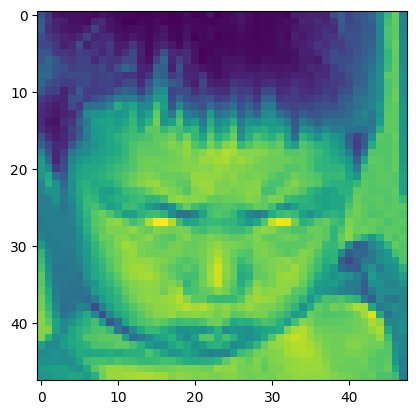

In [ ]:
plt.imshow((train_data[0][0].squeeze()))

In [ ]:
train_data[0][0]

tensor([[[0.1961, 0.1255, 0.0588,  ..., 0.5216, 0.5922, 0.3373],
         [0.2235, 0.1333, 0.0863,  ..., 0.5412, 0.5922, 0.3490],
         [0.2392, 0.1176, 0.0941,  ..., 0.5569, 0.5843, 0.3490],
         ...,
         [0.4039, 0.3922, 0.3922,  ..., 0.5843, 0.4078, 0.3333],
         [0.4196, 0.4353, 0.4431,  ..., 0.5922, 0.4706, 0.3373],
         [0.4078, 0.4078, 0.4392,  ..., 0.5608, 0.5333, 0.3255]]])